# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

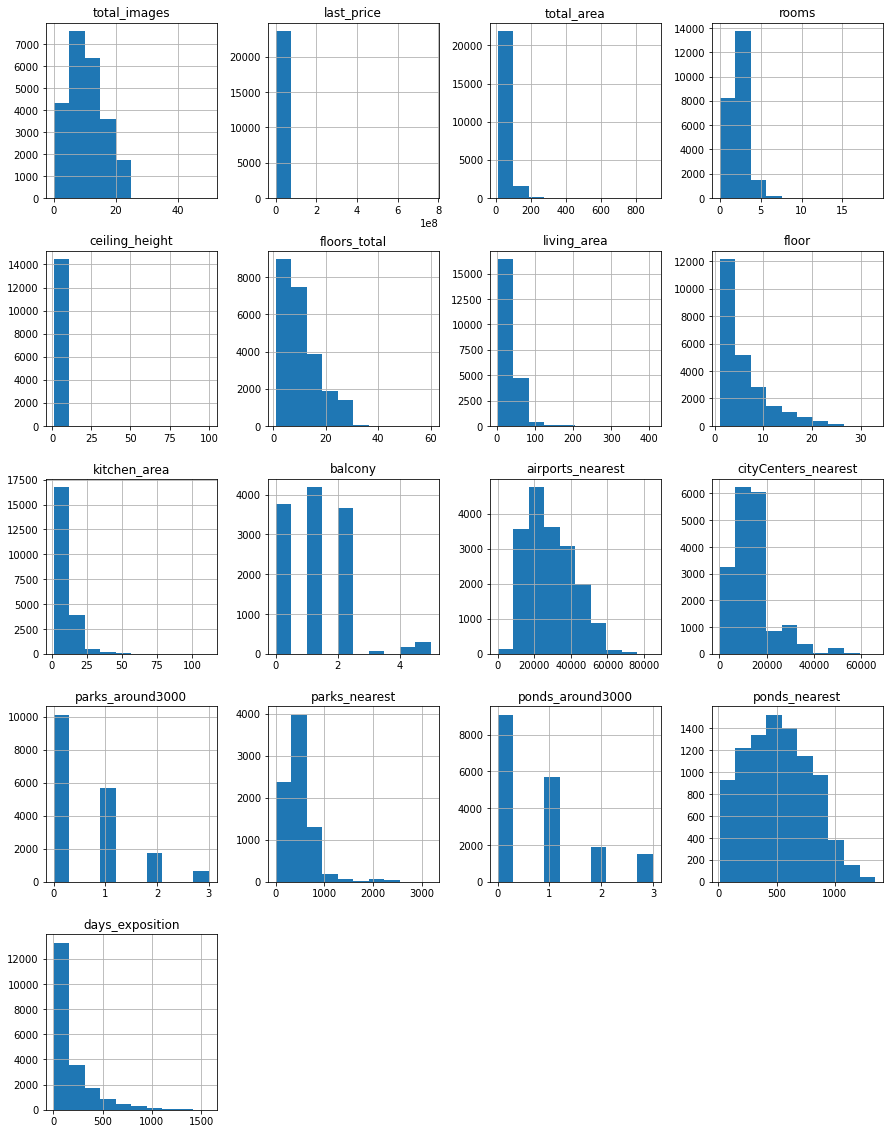

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#Зная, что исходные данные соедененны без исользования табуляции и пробелов, разделяем столбцы методом sep.
data.hist(figsize=(15, 20)) #Строим общую гистограмму для всех числовых столбцов таблицы.

In [2]:
data.head() #Открываем документ и просматриваем общую информацию (верхние пять строчек). 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.tail() #Открываем документ и просматриваем общую информацию (нижние пять строчек). 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info() #Просмотрим основную информацию датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

По условию, колонка "is_apartment", должна иметь значение bool. В настоящий момент, тип данных "object" не является верным.

In [5]:
display(data.describe()) #Просмотрим краткую информацию о датасете.

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Замечаем, что некоторые столбцы имеют неверный тип данных, например, 'first_day_exposition' должен быть в формате datetime, а 'is_apartment ' в формате bool.
Глядя на краткую информацию, видим, что в таблице есть аномальные данные о потолках, где максимальное значение 100, а минимальное 1 метр, что не выглядит естесственно.

### Предобработка данных

In [6]:
display(data.isna().sum()) #Посмотрим сколько пропущенных значений.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
display('Процент пропусков от всего датасета',
        data.isna().mean().sort_values(ascending=False)*100) #Также просмотрим пропуска, но в процентном значении.

'Процент пропусков от всего датасета'

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

In [8]:
display('Количество явных дубликатов',
        data.duplicated().sum())

'Количество явных дубликатов'

0

#### Первые выводы
Из полученных значений можно сделать вывод, что в таблице довольно большое количество пропусков, в некоторых столбцах значение достигает 88.3%. Всего же пропуска присутствуют в 14 колонках. Некоторые данные были записаны неверно, например, максимальная высота потолка достигает 100 м, что является маловероятным. Глядя на первые и последние строки таблицы, можно заметить, что везде указано одинаковое время (00:00). В таблице отсутствуют явные дубликаты.



In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
#Так как в датасете все даты округлены до дней, а часы и минуты не играют никакой роли, есть смысл удалить ненужные значения
# и изменить тим данных, для будующих арифметических вычислений.
display(data['first_day_exposition'].head()) #Проверяем изменения, и замечаем, что тип данных изменился на datetime64[ns].
                                            

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False) #На место пропусков добавлен параметр 'False', так как пользователь
#сайта оставлял это поле пустым.

In [11]:
data['is_apartment'] = data['is_apartment'].astype('bool') #Изменим тип данных в колонке 'is_apartment' на булев.
data['is_apartment'].describe() #Убеждаемся в изменении типа данных.

count     23699
unique        2
top       False
freq      23649
Name: is_apartment, dtype: object

In [12]:
unique_locality_name = data['locality_name'].unique() #Просмотрим все встречающиеся значения.
display(f'Количество значений в столбце', data.locality_name.nunique()) #Количество значений в столбце
display(unique_locality_name)

'Количество значений в столбце'

364

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно заметить довольно большое количество повторяющихся названий населенных пунктов из-за буквы ё. Также есть разница в названиях одних и тех же мест, с использованием приставок "поселок" и "поселок городского типа". Изменим ситуацию.

In [13]:
data.locality_name = data.locality_name.str.replace('ё', 'е') #Заменяем ё на е для упрощения подсчёта данных.
data.locality_name = data.locality_name.str.replace('поселок городского типа', 'поселок') #Также заменяем строки "поселок городского типа"
#на поселок.
data.locality_name = data.locality_name.str.replace('городской поселок', 'поселок') #Меняем однотипные значения.
sorted_locality_name = set(data['locality_name'].unique()) #Просмотрим все значения после удаления дубликатов.
display(f'Количество отсортированных значений', len(sorted_locality_name)) #И подсчитаем их количество.
display(sorted_locality_name) #Смотрим.

'Количество отсортированных значений'

323

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинк

#### Произведена замена типов данных и удалены однотипные значения. Продолжаем предобработку.

In [14]:
display('Количество пропусков (высота потолков)', data.ceiling_height.isna().sum()) #Посмотрим количество пропусков в колонке "высота потолков"

'Количество пропусков (высота потолков)'

9195

In [15]:
display('Количество квартир с соответствующей высотой потолка', data.ceiling_height.value_counts())

'Количество квартир с соответствующей высотой потолка'

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [16]:
display('Общая информация по столбцу', data.ceiling_height.describe())

'Общая информация по столбцу'

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [17]:
ceiling_height_median = data['ceiling_height'].median() #Посчитаем медиану потолков
display(ceiling_height_median)

2.65

In [18]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True) #Заполним недастающие значения медианой

In [19]:
display('Количество пропусков (высота потолков)', data.ceiling_height.isna().sum()) #Посмотрим сколько стало пропусков
display(data['ceiling_height'].describe()) #Посмотрим общую информацию по данному столбцу.

'Количество пропусков (высота потолков)'

0

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [20]:
data = data[data.ceiling_height <= 10] #в таблице присутствуют аномальные значения потолков, например 100 м, уберем их
# и оставим более реалистичное значение потолков до 10 м.
data = data[data.ceiling_height >= 2] #также потолки не могут быть в районе одного метра, срежем значения потолков меньше 2 м.
display('Количество пропусков (высота потолков)', data.ceiling_height.isna().sum()) #Проверим, появились ли пропуски
display('Медиана высоты потолков', ceiling_height_median) #Проверим, изменилась ли медиана потолков.
display(data['ceiling_height'].describe()) #Посмотрим общую информацию по данному столбцу.

'Количество пропусков (высота потолков)'

0

'Медиана высоты потолков'

2.65

count    23671.000000
mean         2.697867
std          0.231904
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

In [21]:
display(data['living_area'].describe()) #Посмотрим общую информацию о жилой площади
data.living_area.isna().sum() #и количество пропусков

count    21768.000000
mean        34.461391
std         22.039074
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

1903

In [22]:
data.groupby('living_area')['last_price'].describe() #Посмотрим на жилую площадь квартиры и последнюю цену

,count,mean,std,min,25%,50%,75%,max
living_area,,,,,,,,
2.0,2.0,4340000.0,2.842569e+06,2330000.0,3335000.0,4340000.0,5345000.0,6350000.0
3.0,2.0,34715000.0,4.281532e+07,4440000.0,19577500.0,34715000.0,49852500.0,64990000.0
5.0,1.0,2680000.0,NaN,2680000.0,2680000.0,2680000.0,2680000.0,2680000.0
5.4,1.0,6100000.0,NaN,6100000.0,6100000.0,6100000.0,6100000.0,6100000.0
6.0,1.0,3799000.0,NaN,3799000.0,3799000.0,3799000.0,3799000.0,3799000.0
...,...,...,...,...,...,...,...,...
322.3,1.0,140000000.0,NaN,140000000.0,140000000.0,140000000.0,140000000.0,140000000.0
332.0,1.0,50000000.0,NaN,50000000.0,50000000.0,50000000.0,50000000.0,50000000.0
347.5,1.0,91500000.0,NaN,91500000.0,91500000.0,91500000.0,91500000.0,91500000.0


In [23]:
data.query('living_area < total_area/2') #Срез от общей к жилой площади квартиры.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,9.1,NaN,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,14.4,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23676,19,3550000.0,36.4,2016-06-08,1,2.65,16.0,14.9,13,False,...,9.3,0.0,Санкт-Петербург,32228.0,11884.0,1.0,701.0,0.0,NaN,70.0
23682,11,2350000.0,35.6,2016-06-23,1,2.50,5.0,17.0,4,False,...,8.3,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23684,20,21400000.0,145.0,2018-11-02,4,3.00,26.0,71.4,17,False,...,15.6,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23689,13,3550000.0,35.3,2018-02-28,1,2.86,15.0,16.3,4,False,...,9.1,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0


In [24]:
data['living_area'].isna().mean()*100 #Пропуски в жилой площади составляют 8%. Заполним их медианным значением.

8.039373072536014

In [25]:
data['ratio_living'] = data['living_area']/data['total_area']*100 #Считаем жилую площадь от общей площади
display(data['ratio_living'].median()) #считаем медиану
display(data['ratio_living'].mean()) #считаем среднее
#Выходные данные практически совпадают, заменим пропуски на медиану.

56.779661016949156

56.47157689547373

In [26]:
# def fill_living (row):
#     living = row['living_area']
#     total = row['total_area']
#     return row['total_area'] * data['ratio_living'].median()/100 #Делим на 100, чтобы получить результат в метрах
# data['living_area'] = data.apply(fill_living, axis=1)
# data['living_area'].isna().sum()
#Заполним недастающие значения медианой. Проверяем, пропусков нет.

In [27]:
# код ревьюера
living_ratio = (data['living_area']/data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_ratio)
data['living_area'].isna().sum()

0

In [28]:
data['living_area'] #Смотрим

0        51.000000
1        18.600000
2        34.300000
3        89.789807
4        32.000000
           ...    
23694    73.300000
23695    38.000000
23696    29.700000
23697    43.341935
23698    12.300000
Name: living_area, Length: 23671, dtype: float64

In [29]:
data['locality_name'].isna().sum() #Посмотрим сумму пропусков в колонке с названиями населенных пунктов. (49 пропусков)
data = data.dropna(subset=['locality_name']) #Удалим пропущенные строки
data['locality_name'].isna().sum() #Проверяем

0

In [30]:
data['balcony'].isna().sum() #Смотрим на пропуске в столбце "балкон". 
# (11506 пропусков, пропуски возникли в квартирах без балконов, заполним пропуски методом fillna)

11503

In [31]:
data['balcony'] = data['balcony'].fillna(0) #Заполняем
data['balcony'].isna().sum() #и проверяем, больше пропусков нет.

0

Заполним пропуски на кухнях

In [32]:
data['ratio_kitchen'] = data['kitchen_area']/data['total_area']*100 #Процент кухонь от всей жилплощади
display('Медиана от общего метража кухонь', data['ratio_kitchen'].median()) #Смотрим медиану
display('Среднее от общего метража кухонь', data['ratio_kitchen'].mean()) #Смотрим среднее

'Медиана от общего метража кухонь'

17.24137931034483

'Среднее от общего метража кухонь'

18.737797449563594

In [33]:
# def fill_kitchen (row):
#     kitchen = row['kitchen_area']
#     total = row['total_area']
#     return row['total_area'] * data['ratio_kitchen'].median()/100
# data['kitchen_area'] = data.apply(fill_kitchen, axis=1)
# data['kitchen_area'].isna().sum()
#Заполним недастающие значения медианой. Проверяем, пропусков нет.

In [34]:
kitchen_ratio = (data['kitchen_area'] / data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_ratio)
data['kitchen_area'].isna().sum()

0

In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15567
ponds_around3000         5500
ponds_nearest           14547
days_exposition          3174
ratio_living             1898
ratio_kitchen            2264
dtype: int64

Остальные пропущенные данные не должны оказывать существенного влияния на исследование или не представляются возможным быть замененными логическими значениями. Продолжим исследование и добавим новые столбцы.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим цену квадратного метра

In [36]:
data['cost_per_meter'] = data['last_price']/data['total_area']
display('Цена за квадратный метр', data['cost_per_meter'].head(10)) #Проверяем, появился новый стобец.

'Цена за квадратный метр'

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
5     95065.789474
6     99195.710456
7    110544.692737
8     87454.764777
9     88524.590164
Name: cost_per_meter, dtype: float64

#### Добавим день, месяц и год публикации объявления 

In [37]:
data['day_of_publication'] = data['first_day_exposition'].dt.day #Добавляем день
data['month_of_publication'] = data['first_day_exposition'].dt.month_name()#Добавляем месяц
data['year_of_publication'] = data['first_day_exposition'].dt.year#Добавляем год

data.head() #Проверяем обновлённую таблицу

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living,ratio_kitchen,cost_per_meter,day_of_publication,month_of_publication,year_of_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,47.222222,23.148148,120370.370370,7,March,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,46.039604,27.227723,82920.792079,4,December,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,61.250000,14.821429,92785.714286,20,August,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.789807,9,False,...,84.0,3.0,234.0,424.0,NaN,NaN,408176.100629,24,July,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,32.000000,41.000000,100000.000000,19,June,2018


#### Добавим тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [38]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_id'] = data.apply(floor, axis=1)
data.head() #В таблице появился новый столбец.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ratio_living,ratio_kitchen,cost_per_meter,day_of_publication,month_of_publication,year_of_publication,floor_id
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,47.222222,23.148148,120370.370370,7,March,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,81.0,46.039604,27.227723,82920.792079,4,December,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,2.0,574.0,558.0,61.250000,14.821429,92785.714286,20,August,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.789807,9,False,...,3.0,234.0,424.0,NaN,NaN,408176.100629,24,July,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,32.000000,41.000000,100000.000000,19,June,2018,другой


#### Добавим расстояние до центра города в километрах

In [39]:
data['center_distance'] = data['cityCenters_nearest'] / 1000 #Так как расстояние указано в метрах, то делим на 1000
data['center_distance'] = data['center_distance'].round(1) #Для удобства округлим тысячные километров до десятых
data.head() #и проверим.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ratio_living,ratio_kitchen,cost_per_meter,day_of_publication,month_of_publication,year_of_publication,floor_id,center_distance
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,755.0,NaN,47.222222,23.148148,120370.370370,7,March,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,81.0,46.039604,27.227723,82920.792079,4,December,2018,первый,18.6
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,574.0,558.0,61.250000,14.821429,92785.714286,20,August,2015,другой,13.9
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.789807,9,False,...,234.0,424.0,NaN,NaN,408176.100629,24,July,2015,другой,6.8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,48.0,121.0,32.000000,41.000000,100000.000000,19,June,2018,другой,8.1


### Проведите исследовательский анализ данных

#### Изучаем следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления

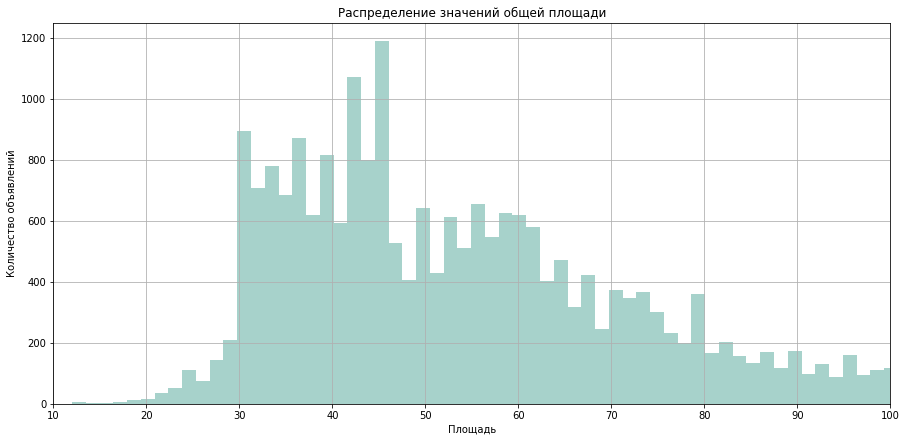

In [40]:
# код ревьюера
import matplotlib.pyplot as plt

data['total_area'].hist(bins = 600, figsize = (15, 7), color='#A7D2CB')
plt.xlim(10, 100)

plt.title('Распределение значений общей площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

In [41]:
display('Общая площадь', data['total_area'].describe())

'Общая площадь'

count    23622.000000
mean        60.338409
std         35.675912
min         12.000000
25%         40.000000
50%         52.000000
75%         69.732500
max        900.000000
Name: total_area, dtype: float64

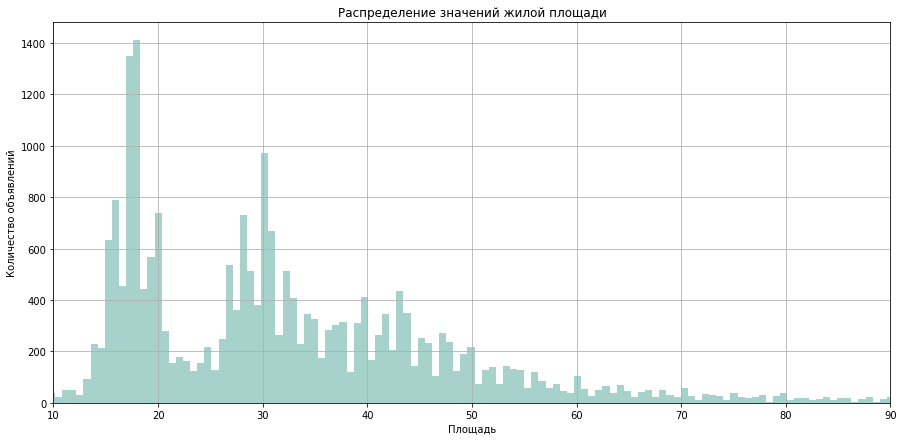

'Жилая площадь'

count    23622.000000
mean        34.553851
std         22.339935
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [42]:
#Жилая площадь
data['living_area'].hist(bins = 600, figsize = (15, 7), color='#A7D2CB')
plt.xlim(10, 90)

plt.title('Распределение значений жилой площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()
display('Жилая площадь', data['living_area'].describe())

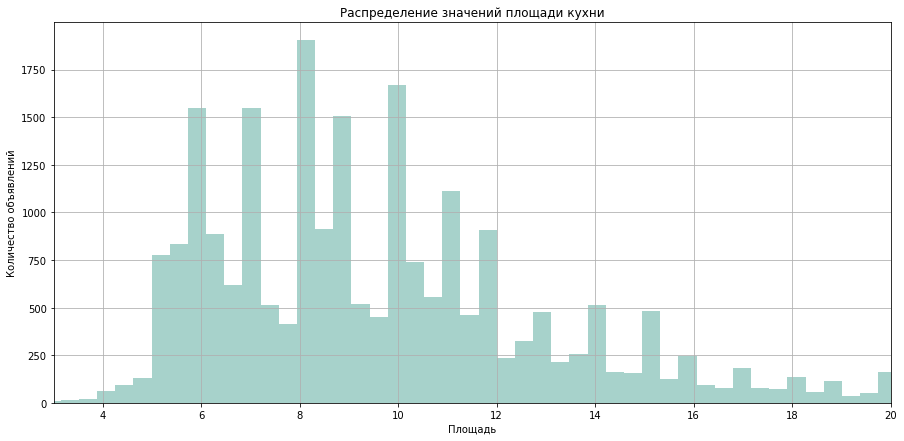

'Площадь кухни'

count    23622.000000
mean        10.571171
std          6.095686
min          1.300000
25%          7.000000
50%          9.074547
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [43]:
data['kitchen_area'].hist(bins = 300, figsize = (15, 7), color='#A7D2CB')
plt.xlim(3, 20)

plt.title('Распределение значений площади кухни')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()
display('Площадь кухни', data['kitchen_area'].describe())

'Цена объекта'

count    2.362200e+04
mean     6.543184e+06
std      1.090227e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799750e+06
max      7.630000e+08
Name: last_price, dtype: float64

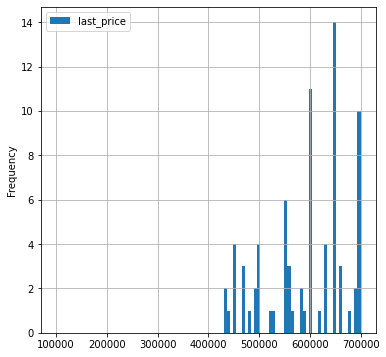

In [44]:
#Цена объекта
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (6,6), range = (100000,700000))
display('Цена объекта', data['last_price'].describe())

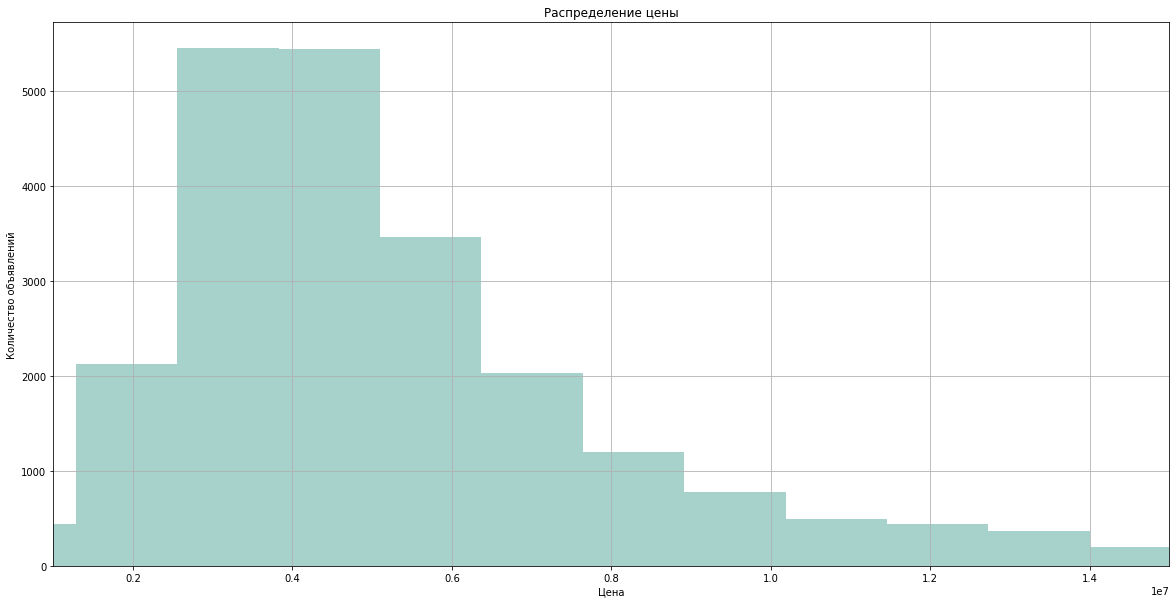

'Цена (млн)'

count    2.362200e+04
mean     6.543184e+06
std      1.090227e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799750e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [45]:
data['last_price'].hist(bins = 600, figsize = (20, 10), color='#A7D2CB')
plt.xlim(1000000, 15000000)

plt.title('Распределение цены')
plt.xlabel('Цена') 
plt.ylabel('Количество объявлений')
plt.show()
display('Цена (млн)', data['last_price'].describe())

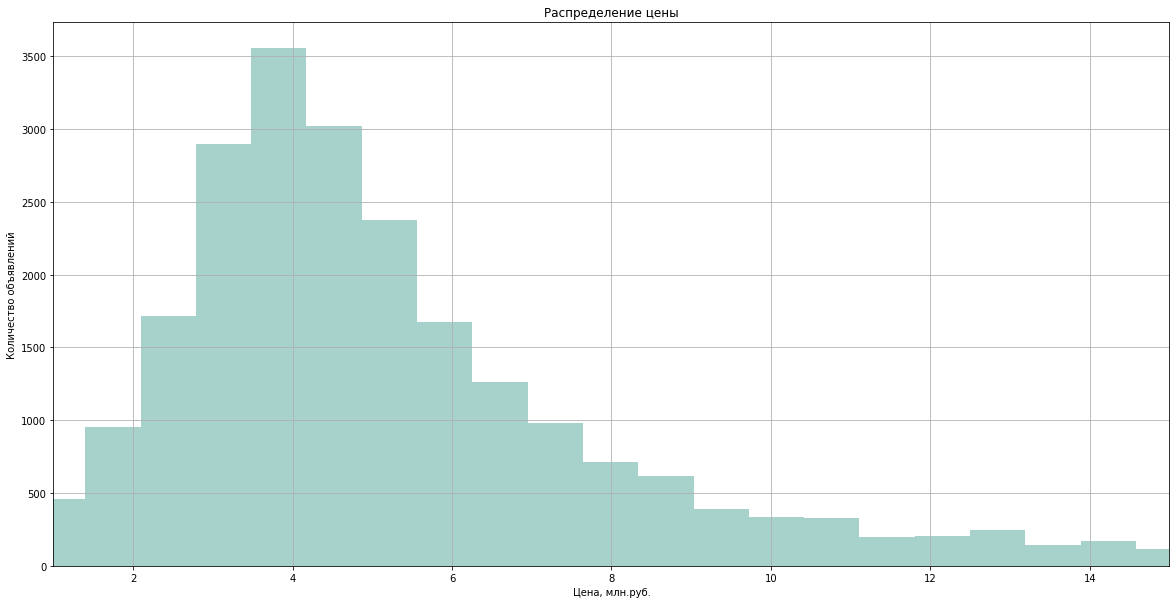

'Цена (млн)'

count    2.362200e+04
mean     6.543184e+06
std      1.090227e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799750e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [46]:
# код ревьюера

data['price_mln'] = data['last_price'] / 1e6

data['price_mln'].hist(bins = 1100, figsize = (20, 10), color='#A7D2CB')
plt.xlim(1, 15)

plt.title('Распределение цены')
plt.xlabel('Цена, млн.руб.') 
plt.ylabel('Количество объявлений')
plt.show()
display('Цена (млн)', data['last_price'].describe())

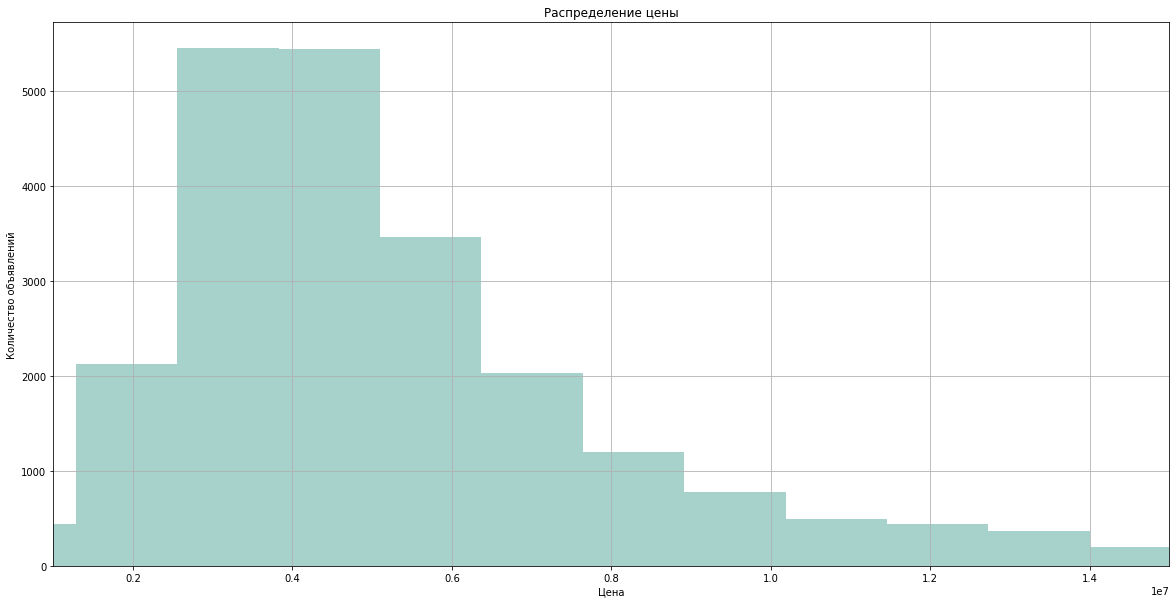

'Цена (млн)'

count    2.362200e+04
mean     6.543184e+06
std      1.090227e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799750e+06
max      7.630000e+08
Name: last_price, dtype: float64

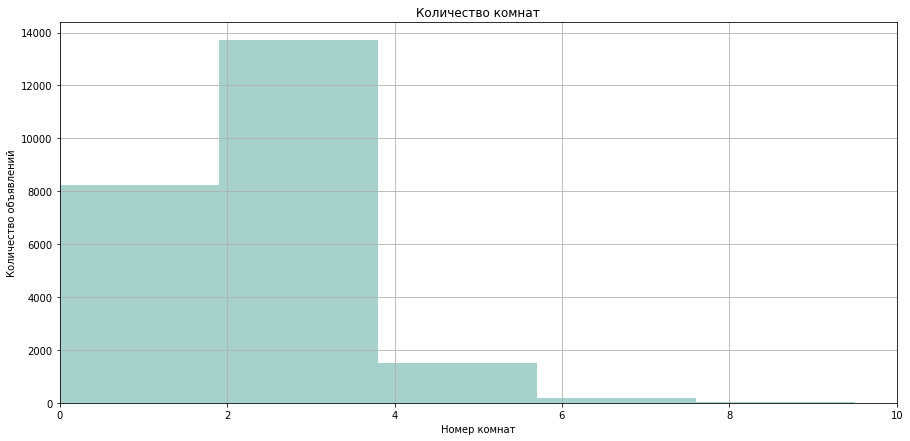

'Количество комнат'

count    23622.000000
mean         2.070358
std          1.078853
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [47]:
data['last_price'].hist(bins = 600, figsize = (20, 10), color='#A7D2CB')
plt.xlim(1000000, 15000000)

plt.title('Распределение цены')
plt.xlabel('Цена') 
plt.ylabel('Количество объявлений')
plt.show()
display('Цена (млн)', data['last_price'].describe())#Количество комнат
data['rooms'].hist(bins = 10, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 10)

plt.title('Количество комнат')
plt.xlabel('Номер комнат') 
plt.ylabel('Количество объявлений')
plt.show()
display('Количество комнат', data['rooms'].describe())

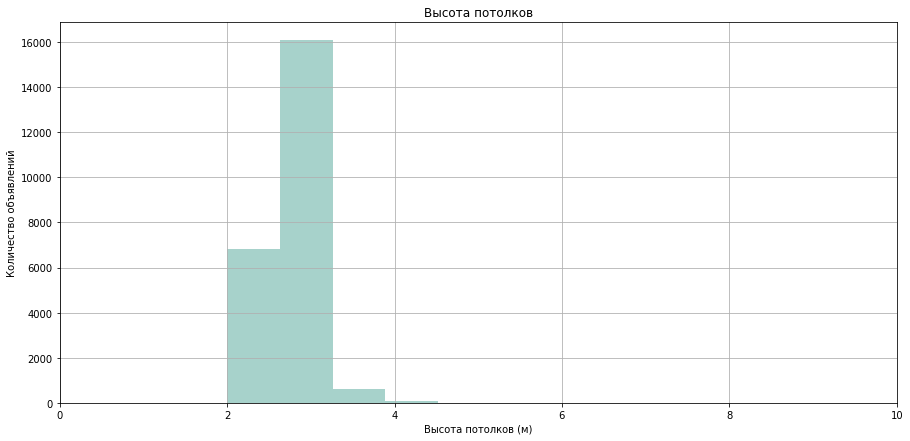

'Высота потолков'

count    23622.000000
mean         2.070358
std          1.078853
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [48]:
data['ceiling_height'].hist(bins = 10, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 10)

plt.title('Высота потолков')
plt.xlabel('Высота потолков (м)') 
plt.ylabel('Количество объявлений')
plt.show()
display('Высота потолков', data['rooms'].describe())

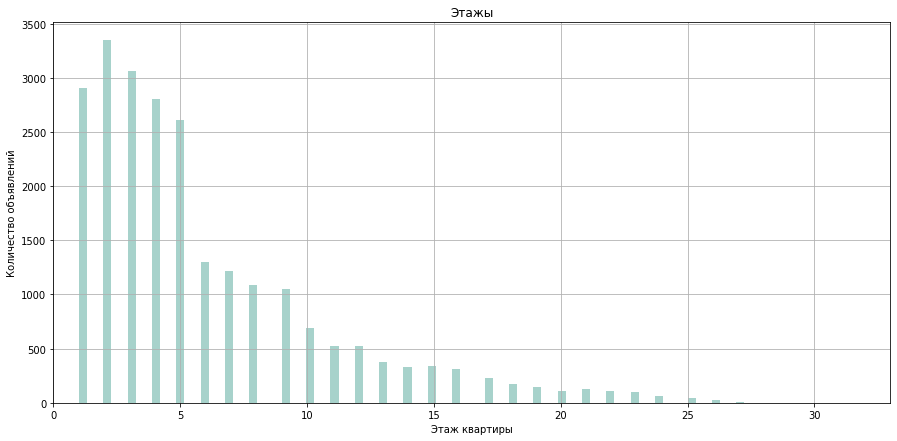

'Этаж квартиры'

count    23622.000000
mean         5.893531
std          4.883024
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [49]:
#Этаж квартиры
data['floor'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 33)

plt.title('Этажы')
plt.xlabel('Этаж квартиры') 
plt.ylabel('Количество объявлений')
plt.show()
display('Этаж квартиры', data['floor'].describe())

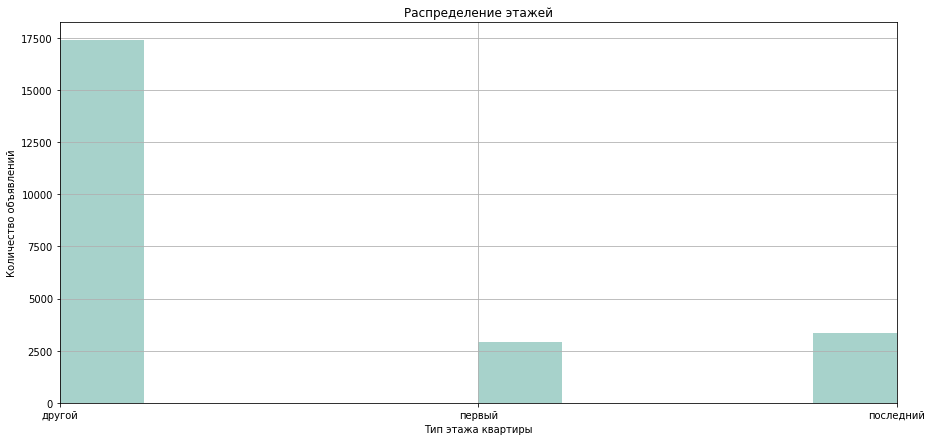

'Тип этажа квартиры'

count      23622
unique         3
top       другой
freq       17386
Name: floor_id, dtype: object

In [50]:
#Тип этажа квартиры («первый», «последний», «другой»)
data['floor_id'].hist(bins = 10, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 2)

plt.title('Распределение этажей')
plt.xlabel('Тип этажа квартиры') 
plt.ylabel('Количество объявлений')
plt.show()
display('Тип этажа квартиры', data['floor_id'].describe())

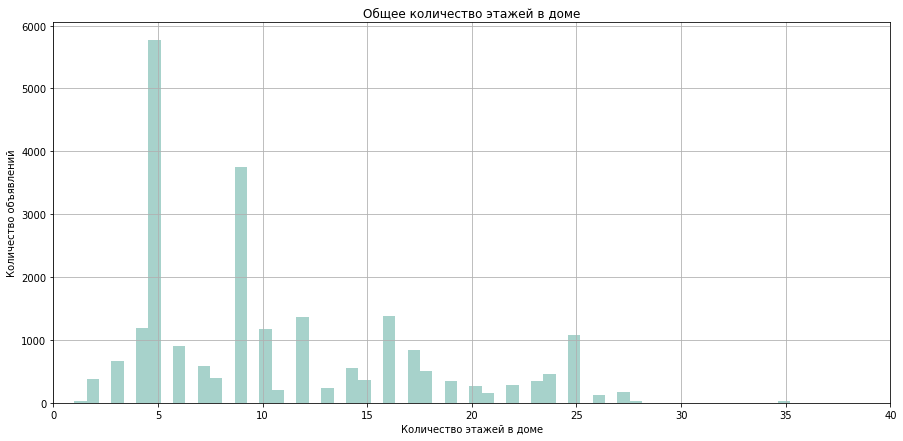

'Количество этажей в доме'

count    23537.000000
mean        10.676169
std          6.590729
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [51]:
#Общее количество этажей в доме
data['floors_total'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 40)

plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей в доме') 
plt.ylabel('Количество объявлений')
plt.show()
display('Количество этажей в доме', data['floors_total'].describe())

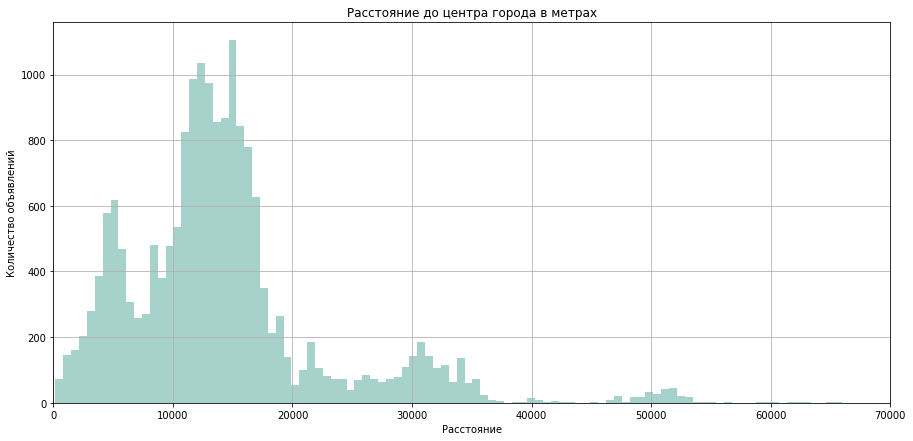

'Расстояние до центра города в метрах'

count    18121.000000
mean     14197.976105
std       8605.365679
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [52]:
#Расстояние до центра города в метрах
data['cityCenters_nearest'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 70000)

plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние') 
plt.ylabel('Количество объявлений')
plt.show()
display('Расстояние до центра города в метрах', data['cityCenters_nearest'].describe())

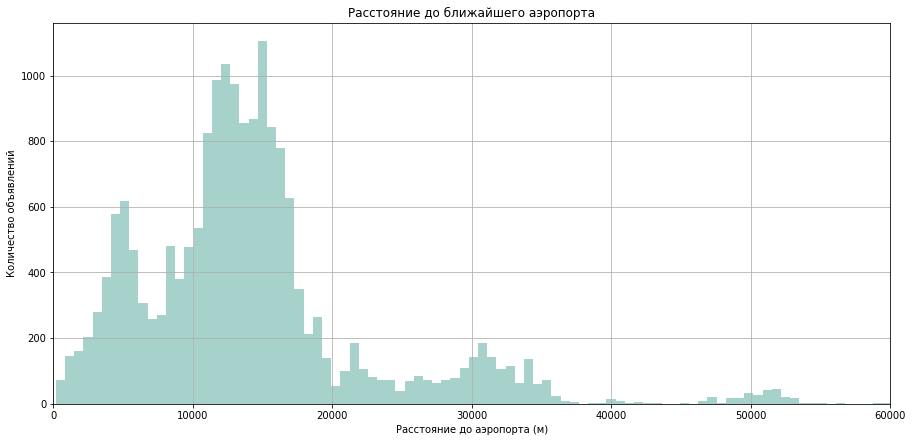

'Расстояние до ближайшего аэропорта'

count    18098.000000
mean     28804.253398
std      12636.164423
min          0.000000
25%      18575.250000
50%      26755.500000
75%      37306.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [53]:
#Расстояние до ближайшего аэропорта в метрах
data['cityCenters_nearest'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 60000)

plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до аэропорта (м)') 
plt.ylabel('Количество объявлений')
plt.show()

display('Расстояние до ближайшего аэропорта', data['airports_nearest'].describe())

In [54]:
#Расстояние до ближайшего парка
#data.plot(y = 'parks_nearest', kind = 'hist', bins = 200, grid=True, figsize = (10, 10), range = (100, 9000))
#display('Расстояние до ближайшего парка', data['parks_nearest'].describe())

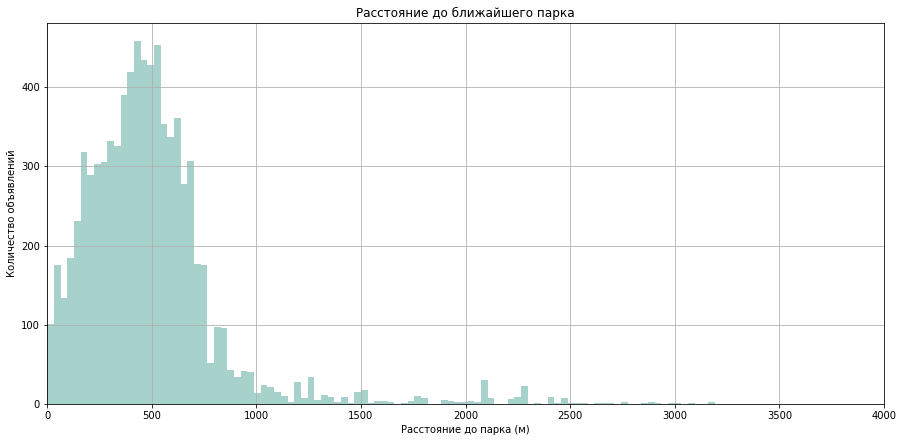

'Расстояние до ближайшего парка'

count    8055.000000
mean      490.852762
std       342.669764
min         1.000000
25%       287.500000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [55]:
#Расстояние до ближайшего парка
data['parks_nearest'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 4000)

plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до парка (м)') 
plt.ylabel('Количество объявлений')
plt.show()
display('Расстояние до ближайшего парка', data['parks_nearest'].describe())

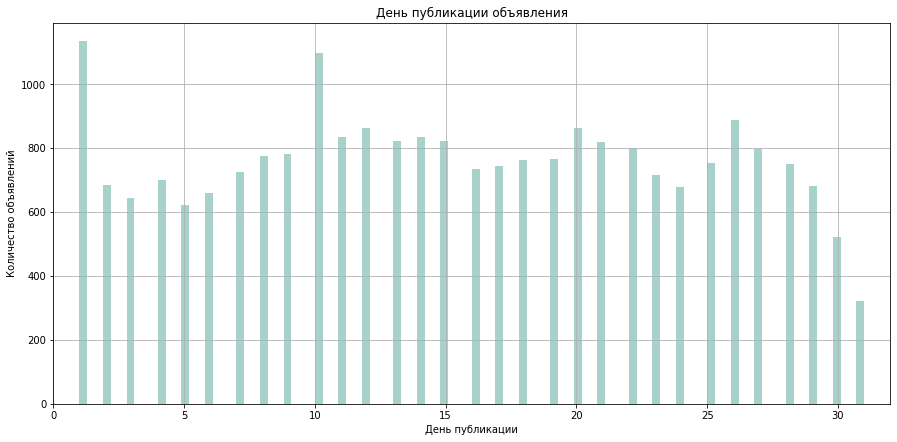

'День публикации объявления'

count    23622.000000
mean        15.475404
std          8.642477
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         31.000000
Name: day_of_publication, dtype: float64

In [56]:
#День публикации объявления

data['day_of_publication'].hist(bins = 100, figsize = (15, 7), color='#A7D2CB')
plt.xlim(0, 32)

plt.title('День публикации объявления')
plt.xlabel('День публикации') 
plt.ylabel('Количество объявлений')
plt.show()
display('День публикации объявления', data['day_of_publication'].describe())

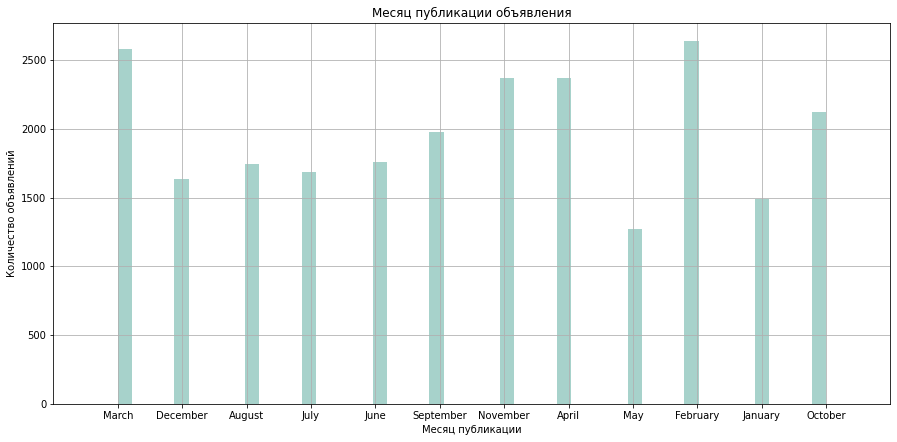

'Месяц публикации объявления'

count        23622
unique          12
top       February
freq          2635
Name: month_of_publication, dtype: object

In [57]:
#Месяц публикации объявления

data['month_of_publication'].hist(bins = 50, figsize = (15, 7), color='#A7D2CB')
plt.xlim(-1, 12)

plt.title('Месяц публикации объявления')
plt.xlabel('Месяц публикации') 
plt.ylabel('Количество объявлений')
plt.show()
display('Месяц публикации объявления', data['month_of_publication'].describe())

Глядя на сформированные графики, приходим к выводу, что серьезные аномалии или выбросы, которые способны повлиять на исследование отсутствуют. Из особенностей отметим, что большинство квартир выставленных на продажу имеют площадь 25-75 кв.м., из них жилая 15-25 м2, кухня 5-8 м2. В основном квартиры продаются не на первом или последнем этажах в 5-ти или 10-ти этажных домах. Расстояние до центра города 14 км, до аэропорта 29 км, в то же время, в более половины случаев, в 500 м от квартиры распологается парк. Самые распространённые месяца подачи объявлений февраль и март, а самые распространённые дни подачи объявлений 1 и 10 числа любого месяца. Средняя цена квартиры на момент продажи - 6,5 млн рублей.

#### Как быстро продавались квартиры

'Как быстро продавались квартиры'

count    20448.000000
mean       180.798073
std        219.839827
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

'Медиана скорости продажи квартир'

95.0

'Среднее скорости продажи квартир'

180.79807316118936

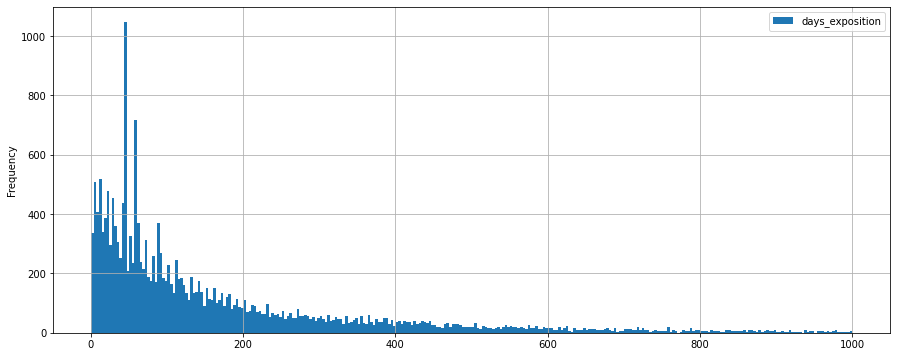

In [58]:
#Как быстро продавались квартиры

data.plot(y = 'days_exposition', kind = 'hist', bins = 300, grid=True, figsize = (15, 6), range = (1, 1000))
display('Как быстро продавались квартиры', data['days_exposition'].describe())
display('Медиана скорости продажи квартир', data['days_exposition'].median()) #Смотрим медиану
display('Среднее скорости продажи квартир', data['days_exposition'].mean()) #Смотрим среднее


Глядя на таблицу, видим, что среднее время продажи квартиры 180 дней, а медиана 95 дней. Успешной может считаться продажа совершенная в течении 100 дней с момента публикации. Все, что не продано за этот срок не может считаться успешной сделкой. Быстрой продажей, может считаться продажа квартиры осуществлённая и снятая с сайта в течений первых 30 дней. Объявления, продолжающие находиться на ресурсе более 400 дней, хоть и редки, но являются необычайно долгими продажами.

#### Факторы влияющие на общую (полную) стоимость объекта

##### Цена от общей площади

,mean,count,median
total_area,,,
100.0,1.279024e+07,72,12145000.0
95.0,1.032119e+07,59,9800000.0
85.0,9.252708e+06,69,9000000.0
90.0,1.029596e+07,83,8800000.0
83.0,8.641082e+06,57,7800000.0
...,...,...,...
31.0,2.896410e+06,346,3050000.0
28.0,2.934821e+06,56,3025000.0
32.0,2.925166e+06,289,3000000.0


,mean,count,median
total_area,,,
12.0,2400000.0,1,2400000.0
13.0,2350000.0,3,1850000.0
13.2,1686000.0,1,1686000.0
14.0,1190000.0,1,1190000.0
15.0,1725000.0,2,1725000.0
...,...,...,...
590.0,65000000.0,1,65000000.0
618.0,300000000.0,1,300000000.0
631.0,140000000.0,1,140000000.0


0.6538373961329502

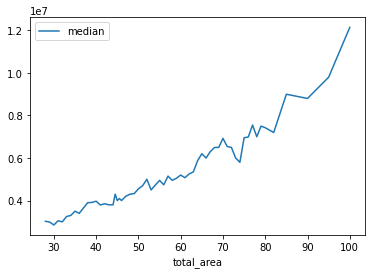

In [59]:
pivot_table_total = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total.columns = ['mean', 'count', 'median'] #Для просмотра этой зависимости, посмотрим на среднее и медеану цены 
display(pivot_table_total.query('count > 50').sort_values('median', ascending = False)) #Чтобы исключить еденичные случаи,
#исключим еденичные случаи, для лучшего анализа рассмотрим как минимум 50 квартир с одинаковыми параметрами.
pivot_table_total.query('count > 50').plot(y = 'median')
display(pivot_table_total)
data['total_area'].corr(data['last_price'])
#Построим таблицы и графики зависимости цены и общей площади.

Глядя на график можно заметить зависимость от роста цены по отношению к квадратному метру. С ростом первой величины растёт вторая, коэффициент корреляции Пирсона — положительный, что ещё раз подтверждает гипотезу.

##### Цена от жилой площади

,mean,count,median
living_area,,,
60.0,1.358144e+07,72,11700000.0
55.0,1.005159e+07,63,9300000.0
53.0,8.904679e+06,78,8545000.0
56.0,1.061640e+07,73,8500000.0
51.0,9.807232e+06,69,8300000.0
...,...,...,...
15.5,3.528097e+06,76,3300000.0
18.0,3.450011e+06,882,3300000.0
17.5,3.339106e+06,170,3300000.0


,mean,count,median
living_area,,,
2.00000,4340000.0,2,4340000.0
3.00000,34715000.0,2,34715000.0
5.00000,2680000.0,1,2680000.0
5.40000,6100000.0,1,6100000.0
6.00000,3799000.0,1,3799000.0
...,...,...,...
332.00000,50000000.0,1,50000000.0
347.50000,91500000.0,1,91500000.0
356.33565,140000000.0,1,140000000.0


0.5858309980653774

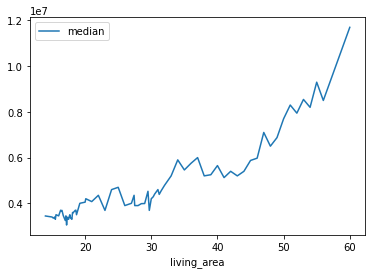

In [60]:
pivot_table_living = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living.columns = ['mean', 'count', 'median'] #Для просмотра этой зависимости, посмотрим на среднее и медиану цены 
display(pivot_table_living.query('count > 50').sort_values('median', ascending = False)) #Чтобы исключить еденичные случаи,
#исключим еденичные случаи, для лучшего анализа рассмотрим как минимум 50 квартир с одинаковыми параметрами.
pivot_table_living.query('count > 50').plot(y = 'median')
display(pivot_table_living)
data['living_area'].corr(data['last_price'])
#Построим таблицы и графики зависимости цены и общей площади.

<AxesSubplot:xlabel='[living_area]', ylabel='last_price'>

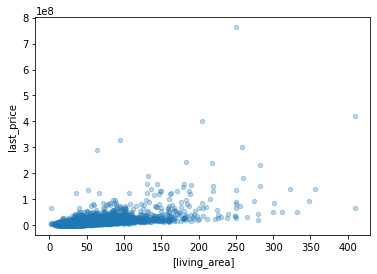

In [61]:
data.plot(x=['living_area'], y='last_price', kind='scatter', alpha=0.3) 

График похож на предыдущий, можно с увереностью сказать, что зависимость цены от размера жилой площади есть. 

##### Цена от площади кухни

,mean,count,median
kitchen_area,,,
30.0,2.278725e+07,60,13700000.0
20.0,1.732050e+07,136,11499500.0
22.0,1.864518e+07,55,11000000.0
25.0,1.606463e+07,63,10900000.0
19.0,1.324805e+07,69,10900000.0
...,...,...,...
5.6,3.261790e+06,138,3200000.0
5.0,3.377084e+06,357,3180000.0
5.7,3.324225e+06,80,3150000.0


,mean,count,median
kitchen_area,,,
1.300000,4.250000e+06,1,4250000.0
2.000000,2.821429e+06,7,2720000.0
2.248536,2.400000e+06,1,2400000.0
2.300000,2.940000e+06,1,2940000.0
2.400000,2.200000e+06,1,2200000.0
...,...,...,...
93.688987,1.500000e+08,1,150000000.0
100.000000,6.500000e+07,1,65000000.0
100.700000,1.250000e+07,1,12500000.0


0.5169408900577587

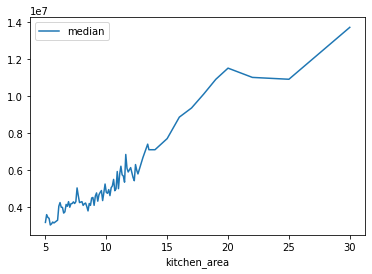

In [62]:
pivot_table_kitchen = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen.columns = ['mean', 'count', 'median'] #Для просмотра этой зависимости, посмотрим на среднее и медеану цены 
display(pivot_table_kitchen.query('count > 50').sort_values('median', ascending = False)) #Чтобы исключить еденичные случаи,
#исключим еденичные случаи, для лучшего анализа рассмотрим как минимум 50 квартир с одинаковыми параметрами.
pivot_table_kitchen.query('count > 50').plot(y = 'median')
display(pivot_table_kitchen)
data['kitchen_area'].corr(data['last_price'])
#Построим таблицы и графики зависимости цены и общей площади.

Чем больше квадратных метров на кухне - тем выше цена.

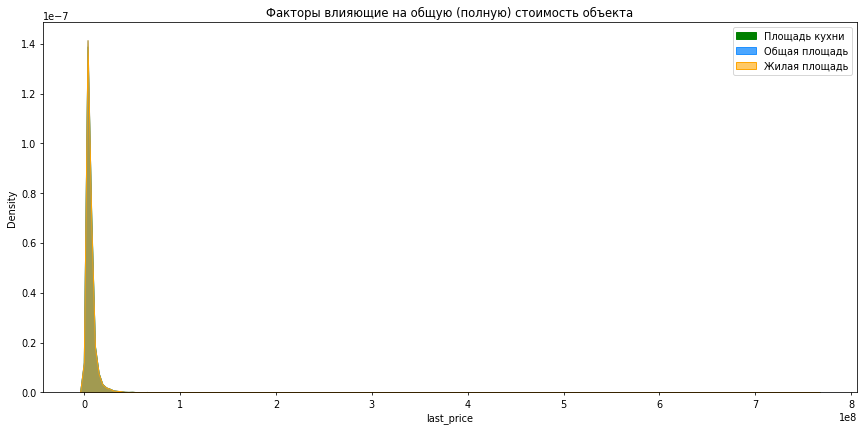

In [63]:
import seaborn as sns
# Строим график
plt.figure(figsize=(15, 7), dpi= 70)
#sns.kdeplot(data.loc[data['last_price'] >= 1000000, "last_price"], shade=True, color="deeppink", label="Цена", alpha=0.3)
sns.kdeplot(data.loc[data['kitchen_area'] >= 5, "last_price"], shade=True, color="g", label="Площадь кухни", alpha=1)
sns.kdeplot(data.loc[data['total_area'] >= 10, "last_price"], shade=True, color="dodgerblue", label="Общая площадь", alpha=.8)
sns.kdeplot(data.loc[data['living_area'] >= 5, "last_price"], shade=True, color="orange", label="Жилая площадь", alpha=.6)

plt.title('Факторы влияющие на общую (полную) стоимость объекта', fontsize=12)
plt.legend()
plt.show()

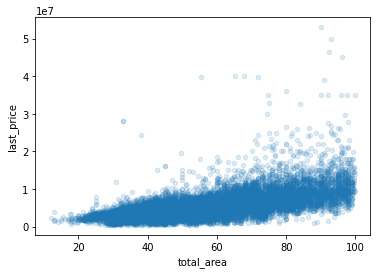

count    23622.000000
mean        60.338409
std         35.675912
min         12.000000
25%         40.000000
50%         52.000000
75%         69.732500
max        900.000000
Name: total_area, dtype: float64


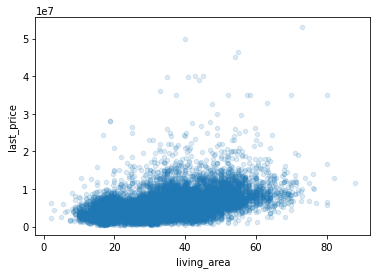

count    23622.000000
mean        34.553851
std         22.339935
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


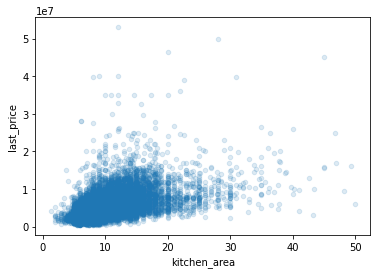

count    23622.000000
mean        10.571171
std          6.095686
min          1.300000
25%          7.000000
50%          9.074547
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [64]:
for column in ['total_area', 'living_area', 'kitchen_area']:
    data.query('total_area<100').plot(x=column, y='last_price', kind='scatter', alpha=0.15)
    plt.show()
    print(data[column].describe())

##### Цена от количества комнат

,mean,count,median
rooms,,,
7,163569.923180,59,108827.085852
0,108454.507531,196,105326.797386
1,100758.694921,8028,100000.000000
6,140718.807406,105,99411.764706
5,126750.342565,326,96517.068099
2,95517.056254,7910,92814.371257
4,110352.728729,1174,92636.989931
3,97204.650937,5793,88983.050847


0.3635616130638091

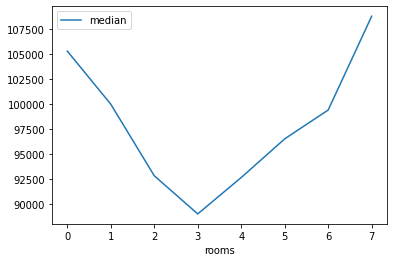

In [65]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'cost_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median'] #Для просмотра этой зависимости, посмотрим на среднее и медеану цены 
display(pivot_table_rooms.query('count > 30').sort_values('median', ascending = False)) #Чтобы исключить еденичные случаи,
#исключим еденичные случаи, для лучшего анализа рассмотрим как минимум 30 квартир с одинаковыми параметрами.
pivot_table_rooms.query('count > 30').plot(y = 'median')
data['rooms'].corr(data['last_price'])
#Построим таблицы и графики зависимости цены и общей площади.

Можем заметить медиану цены за квадратный метр, которая падает по отношении к 3 комнатным квартирам, но возобновляет свой рост с 4 и более -комнатных квартир. Можно предположить, что цена зависит от спроса, а сейчас популярны однокомнатные квартиры.

##### Цена от этажа, на котором расположена квартира (первый, последний, другой)

,mean,count,median
floor,,,
1,4.801925e+06,2910,3900000.0
2,6.165342e+06,3345,4490000.0
3,6.736753e+06,3061,4646000.0
4,7.141123e+06,2800,4700000.0
5,6.613248e+06,2611,4400000.0
6,7.537230e+06,1302,5100000.0
7,7.908026e+06,1214,4950000.0
8,6.824281e+06,1083,4800000.0
9,6.309537e+06,1050,4670000.0


0.026708943451449908

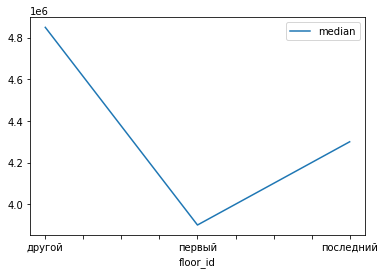

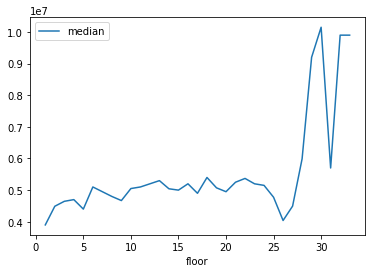

In [66]:
pivot_table_floor = data.pivot_table(
 index = 'floor_id', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor.columns = ['mean', 'count', 'median']
pivot_table_floor.plot(y = 'median')
pivot_table_floor = data.pivot_table(
 index = 'floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor.columns = ['mean', 'count', 'median']
pivot_table_floor.plot(y = 'median')
display(pivot_table_floor)
display(data['floor'].corr(data['last_price']))

Замечаем, что первый этаж - самый дешевый, последний - немного дороже. Самые дорогие квартиры - в сегменте "не первый и не последний этаж". Исключением являются 27-28 этажи.

##### Цена от даты размещения (день недели, месяц, год)

'Цена от даты размещения (день недели)'

,mean,count,median
weekday,,,
1,6.395656e+06,4169,4720000.0
2,6.626873e+06,3960,4700000.0
0,6.515023e+06,3601,4650000.0
3,6.713689e+06,4283,4650000.0
4,6.367287e+06,3986,4580000.0
5,6.983381e+06,1932,4567500.0
6,6.250720e+06,1691,4550000.0


0.0015607779862137718

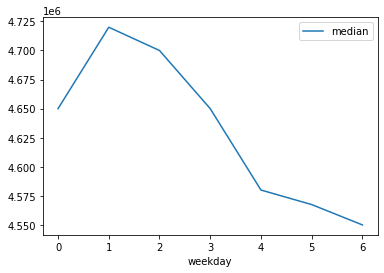

In [67]:
display('Цена от даты размещения (день недели)')
data['weekday'] = data['first_day_exposition'].dt.weekday
pivot_table_weekday = data.pivot_table(
 index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['mean', 'count', 'median']
display(pivot_table_weekday.sort_values('median', ascending = False))
pivot_table_weekday.plot(y = 'median')
data['weekday'].corr(data['last_price'])


Можно заметить, что объявления размещённые во вторник - самые дорогие, а в воскрессение - самые дешевые.

,mean,count,median
month_of_publication,,,
April,6.742075e+06,2371,4800000.0
December,7.010484e+06,1636,4700000.0
November,6.462963e+06,2366,4700000.0
September,6.831180e+06,1977,4700000.0
March,6.368688e+06,2577,4685000.0
February,6.466914e+06,2635,4650000.0
July,6.637379e+06,1687,4650000.0
January,6.665980e+06,1490,4600000.0
August,6.356751e+06,1740,4580000.0


<AxesSubplot:xlabel='month_of_publication'>

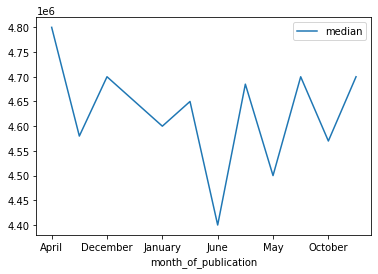

In [68]:
pivot_table_month = data.pivot_table(
 index = 'month_of_publication', 
 values = 'last_price', 
 aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['mean', 'count', 'median']
display(pivot_table_month.sort_values('median', ascending = False))
pivot_table_month.plot(y = 'median') 

Самые дорогие квартиры, продаются в апреле, а самые дешёвые в июне.

,mean,count,median
year_of_publication,,,
2014,1.204660e+07,136,7640000.0
2015,8.598609e+06,1172,5350000.0
2019,6.786280e+06,2872,5050000.0
2016,6.829415e+06,2765,4550000.0
2018,5.952495e+06,8503,4550000.0
2017,6.589137e+06,8174,4500000.0


-0.042957785860393276

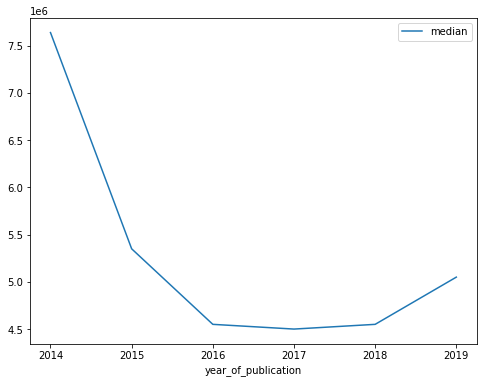

In [69]:
pivot_table_year = data.pivot_table(
 index = 'year_of_publication', 
 values = 'last_price', 
 aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']
display(pivot_table_year.sort_values('median', ascending = False))
pivot_table_year.plot(y = 'median', figsize=(8,6)) 
data['year_of_publication'].corr(data['last_price'])

Дороже всего квартиры стоили в 2014 году, с 16 по 17 гг. цена была примерно одинаковой, а с 18 года наметился тренд на удорожание.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [70]:
top_ten = data.groupby('locality_name').count().sort_values(by='last_price', ascending=False).head(10)
display(top_ten) #Выясним названия населённых пунктов с наибольшим числом объявлений. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ratio_living,ratio_kitchen,cost_per_meter,day_of_publication,month_of_publication,year_of_publication,floor_id,center_distance,price_mln,weekday
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,15704,15704,15704,15704,15704,15704,15634,15704,15704,15704,...,14564,14328,15704,15704,15704,15704,15704,15643,15704,15704
поселок Мурино,554,554,554,554,554,554,550,554,554,554,...,490,449,554,554,554,554,554,2,554,554
поселок Шушары,440,440,440,440,440,440,439,440,440,440,...,404,398,440,440,440,440,440,436,440,440
Всеволожск,398,398,398,398,398,398,398,398,398,398,...,371,357,398,398,398,398,398,0,398,398
Пушкин,369,369,369,369,369,369,369,369,369,369,...,345,338,369,369,369,369,369,368,369,369
Колпино,338,338,338,338,338,338,338,338,338,338,...,328,322,338,338,338,338,338,337,338,338
поселок Парголово,327,327,327,327,327,327,327,327,327,327,...,301,289,327,327,327,327,327,327,327,327
Гатчина,306,306,306,306,306,306,306,306,306,306,...,291,294,306,306,306,306,306,0,306,306
деревня Кудрово,299,299,299,299,299,299,299,299,299,299,...,262,231,299,299,299,299,299,0,299,299


Список мест: Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг.

<AxesSubplot:>

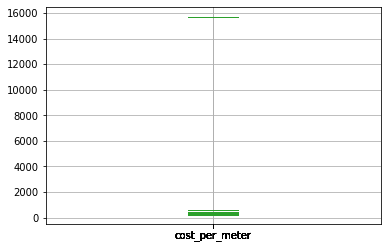

In [71]:
top_ten.query('locality_name == "Санкт-Петербург"').boxplot(column='cost_per_meter')
top_ten.query('locality_name == "поселок Мурино"').boxplot(column='cost_per_meter')
top_ten.query('locality_name == "поселок Шушары"').boxplot(column='cost_per_meter')
top_ten.query('locality_name == "Всеволожск"').boxplot(column='cost_per_meter')
top_ten.query('locality_name == "Пушкин"').boxplot(column='cost_per_meter')
top_ten.query('locality_name == "Колпино"').boxplot(column='cost_per_meter')
top_ten.query('locality_name == "поселок Парголово"').boxplot(column='cost_per_meter')
top_ten.query('locality_name == "Гатчина"').boxplot(column='cost_per_meter')
top_ten.query('locality_name == "деревня Кудрово"').boxplot(column='cost_per_meter')
top_ten.query('locality_name == "Выборг"').boxplot(column='cost_per_meter')
#Посмотрим на цену за квадратный метр на диаграмме размаха.

В диаграмме размаха видно, что недвижимость в Санкт-Петербурге дороже всего. 

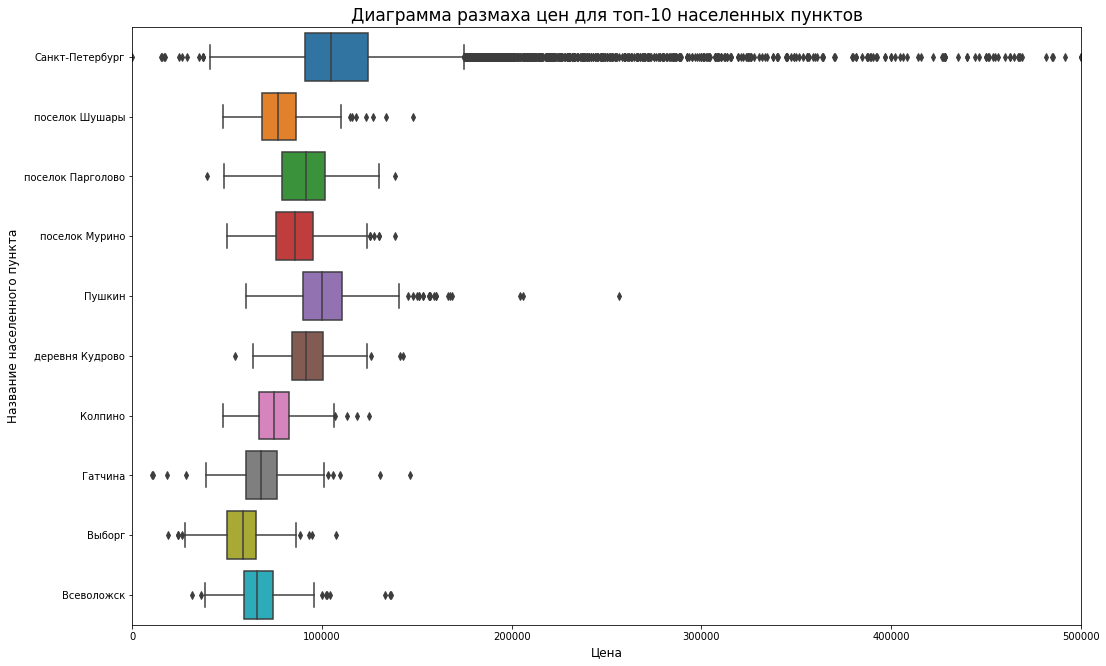

In [72]:
# код ревьюера

import seaborn as sns

plt.figure(figsize=(17, 11))
sns.boxplot(data=data[data['locality_name'].isin(top_ten.index)], y='locality_name', x='cost_per_meter')
plt.xlim(0, 0.5e6)

plt.title('Диаграмма размаха цен для топ-10 населенных пунктов', size=17)
plt.xlabel('Цена', size=12)
plt.ylabel('Название населенного пункта', size=12)

plt.show()

In [73]:
pivot_table_city = data.pivot_table(
 index = 'locality_name', 
 values = 'first_day_exposition', 
 aggfunc = ['count'])
pivot_table_city.columns = ['count']
display(pivot_table_city.sort_values(
 by='count',ascending=False).head(10))

,count
locality_name,
Санкт-Петербург,15704
поселок Мурино,554
поселок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
поселок Парголово,327
Гатчина,306
деревня Кудрово,299


In [74]:
# Выясним среднюю цену за м2
pivot_table_cost_per_meter = data.pivot_table(
 index = 'locality_name', 
 values = 'cost_per_meter', 
 aggfunc = ['mean'])
pivot_table_cost_per_meter.columns = ['mean']
pivot_table_cost_per_meter.sort_values(by='mean',ascending=False).head(10)

,mean
locality_name,
Зеленогорск,115122.799198
Санкт-Петербург,114829.094624
поселок Репино,104238.614786
Пушкин,103125.819291
Сестрорецк,101757.616875
поселок Лисий Нос,100660.814239
Кудрово,100253.043304
деревня Мистолово,98549.976709
поселок Левашово,96997.690531


In [75]:
#Видим, что количество объявлений влияет на исследование, поэтому Зеленогорск не может быть принят в топ 10 городов.
display(('Объявления и средняя цена'),
        pivot_table_city.join(pivot_table_cost_per_meter).sort_values(by='count',ascending=False).head(10))


'Объявления и средняя цена'

,count,mean
locality_name,,
Санкт-Петербург,15704,114829.094624
поселок Мурино,554,85656.214377
поселок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
поселок Парголово,327,90175.913458
Гатчина,306,68757.678644
деревня Кудрово,299,92473.547576


(0.0, 300000.0)

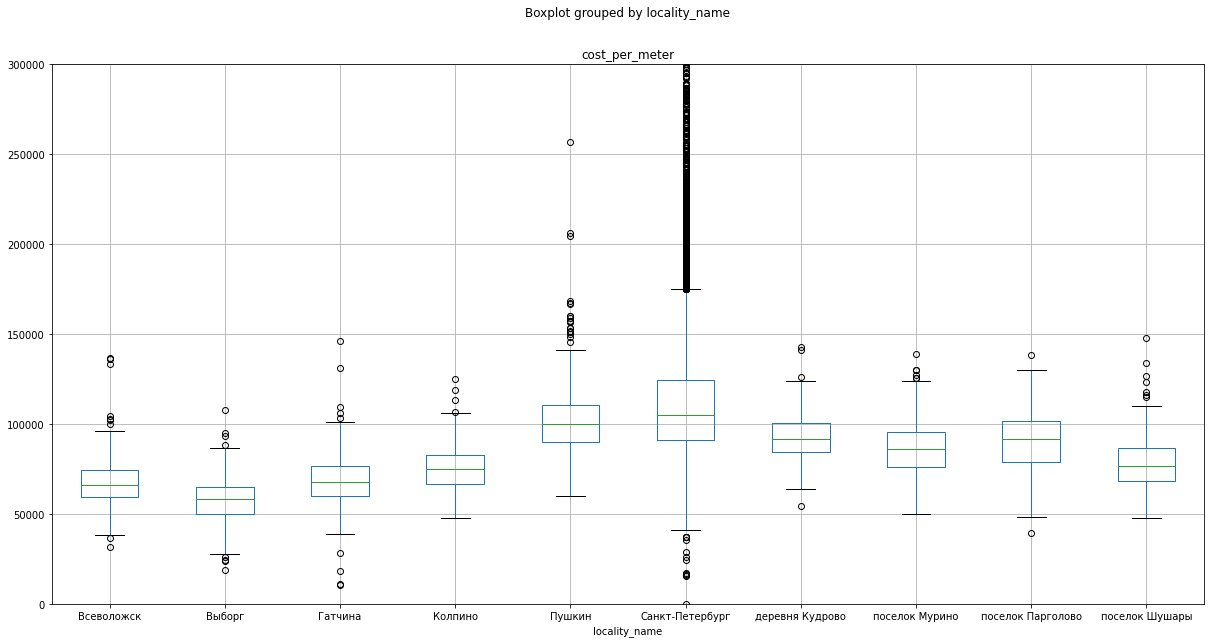

In [76]:
top_locality = pivot_table_city.sort_values(by='count',ascending=False).head(10)
ax = (data
 .query('locality_name in @top_locality.index')
 .boxplot('cost_per_meter', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 300000)


Если обращать внимание на количество объявлений, то безусловным лидером является Санкт-Петербург. Примерная цена за м2 100.000,
в тоже время есть объекты, в которых цена начинается от 150.000 и больше за м2. А замыкает топ-10 г. Выборг, со средней ценой 60.000 за м2.

In [77]:
pivot_table_cheap_expensive = data.pivot_table(
 index = 'locality_name', 
 values = 'cost_per_meter', 
 aggfunc = ['mean','median'])
pivot_table_cheap_expensive.columns = ['mean','median']
display('Cамый дешевый квадратный метр в:',
 pivot_table_cheap_expensive[pivot_table_cheap_expensive['mean'] == pivot_table_cheap_expensive['mean'].min()])
display('Самый дорогой квадратный метр в:',
 pivot_table_cheap_expensive[pivot_table_cheap_expensive['mean'] == pivot_table_cheap_expensive['mean'].max()])
# Если не обращать внимание на объявления, то получаем следующие результаты:

'Cамый дешевый квадратный метр в:'

,mean,median
locality_name,,
деревня Старополье,11206.221198,11000.0


'Самый дорогой квадратный метр в:'

,mean,median
locality_name,,
Зеленогорск,115122.799198,101666.666667


#### Cредняя цена каждого километра в Санкт-Петербурге

In [78]:
# Старый код

#spb_apartments = data.query(
#    'locality_name == "Санкт-Петербург"')

#pivot_table_area_spb_apartments = spb_apartments.pivot_table(
#    index = 'center_distance', values = 'last_price', aggfunc = ['mean', 'count'])
#pivot_table_area_spb_apartments.columns = ['mean', 'count']

#display('Среднее цены за квартиру', 
#        pivot_table_area_spb_apartments.query('count > 10').sort_values('mean'))
#display('Взаимосвязь влияния цены на удаленность от центра', 
#        spb_apartments.cost_per_meter.corr(spb_apartments.center_distance))
#display('Таблица влияние цены на удаленность от центра', 
#        pivot_table_area_spb_apartments.plot(y = 'mean'))

'Взаимосвязь влияния цены на удаленность от центра'

-0.3139231853642885

,last_price
cityCenters_nearest_km,
0,2.344232e+07
1,1.885085e+07
2,1.616331e+07
3,1.345377e+07
4,1.363202e+07
5,1.530612e+07
6,1.438911e+07
7,1.279767e+07
8,8.449374e+06


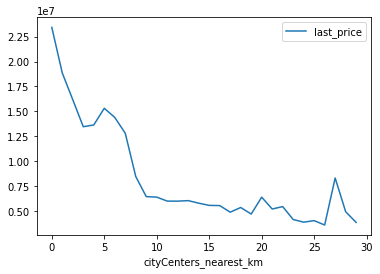

In [79]:
spb_apartments = data.query('locality_name == "Санкт-Петербург"')

data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000 #Т.к. значения указаны в метрах, делим на 1000 
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(1500) #Пустые данные заполним любым числом
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

display('Взаимосвязь влияния цены на удаленность от центра',
        spb_apartments.cost_per_meter.corr(spb_apartments.cityCenters_nearest)) # Посмотрим на корреляцию


pivot_table_center = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=1500').pivot_table(
    index = 'cityCenters_nearest_km', #Построим таблицу и не забудем указать число, которым мы закрыли пустые данные
    values = 'last_price',
    aggfunc = 'mean')
pivot_table_center.plot()
pivot_table_center

Глядя на таблицу и график можно прийти к выводу, что квартиры дешевеют в зависимости от удаления от центра города. Самые дорогие квартиры в нулевом километре от центра города, далее тренд идёт вниз, слегка возврастая на 5 км, что может говорить о нахождении на этом месте важного культурного или социально значимого объекта, позволяющим увеличить цену. Самые дешевые квратиры начинаются на расстроянии 19 км и далее от города.
Коэфициент (corr) выдал отрицательное значение, т.к. рост одной величины (дистанция от центра) связан с уменьшением другой (средняя цена). Это ещё раз подтверждает гипотезу.

Глядя на таблицу и график можно прийти к выводу, что квартиры дешевеют в зависимости от удаления от центра города.
Коэфициент (corr) выдал отрицательное значение, т.к. рост одной величины (дистанция от центра) связан с уменьшением другой (средняя цена).
Это ещё раз подтверждает гипотезу.

### Общий вывод

Проведенно изучение объявлений о продаже квартир в Санкт-Петербурге и окрестностях.
Произведена предобработака данных: переименованны одинаковые значения, удалены или заменены отсутствующие значения, добавлены новые столбцы. 
Исследовали данные: рассмотрели различные параметры столбцов, построили графики и гипсограммы, описали различные наблюдения и особенности.
В итоге исследования мы пришли к выводу, что квартиры дорожают по мере приблежения к центру города, увеличения квадратных метров, дорогая квартира не должна быть не первом или последнем этаже. Одна из интересных особенностей, что цена за м2 в однокомнатных квартирах выше чем в трёхкомнатных квартирах. 
Самые дорогие варианты были размещены в 2014 году, а с 2019 года идёт тренд на рост цены на недвижимость.
Таким образом можно описать среднестатистическую квартиру. Это 35м2, однокомнатная квартира, с потолком на уровне 2,6м, в 6 этажном доме на 4 этаже, в квартире 20 квадратных метров жилой площади, 6 квадратных м отведено на кухню, 1 кв м. занимает балкон, в 300-х метрах от квартиры есть пруд, дистанция до центра города около 8 км. Цена такой квартиры 10 млн рублей, а продается она в среднем за 219 дней.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод